dataset link https://www.kaggle.com/datasets/luyezhang/heart-2020-cleaned

In [104]:
# type: ignore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [55]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [56]:
df.head().T

,0,1,2,3,4
heartdisease,no,no,no,no,no
bmi,16.6,20.34,26.58,24.21,23.71
smoking,yes,no,yes,no,no
alcoholdrinking,no,no,no,no,no
stroke,no,yes,no,no,no
physicalhealth,3.0,0.0,20.0,0.0,28.0
mentalhealth,30.0,0.0,30.0,0.0,0.0
diffwalking,no,no,no,no,yes
sex,female,female,male,female,female
agecategory,55-59,80_or_older,65-69,75-79,40-44


In [57]:
categorical_columns

['heartdisease',
 'smoking',
 'alcoholdrinking',
 'stroke',
 'diffwalking',
 'sex',
 'agecategory',
 'race',
 'diabetic',
 'physicalactivity',
 'genhealth',
 'asthma',
 'kidneydisease',
 'skincancer']

In [58]:
for col in categorical_columns[1:]:
    print(col,end='\t')    
    print(df[col].nunique(),end='\t')
    print(df[col].unique()[:5],end='\t')
    print()

smoking	2	['yes' 'no']	
alcoholdrinking	2	['no' 'yes']	
stroke	2	['no' 'yes']	
diffwalking	2	['no' 'yes']	
sex	2	['female' 'male']	
agecategory	13	['55-59' '80_or_older' '65-69' '75-79' '40-44']	
race	6	['white' 'black' 'asian' 'american_indian/alaskan_native' 'other']	
diabetic	4	['yes' 'no' 'no,_borderline_diabetes' 'yes_(during_pregnancy)']	
physicalactivity	2	['yes' 'no']	
genhealth	5	['very_good' 'fair' 'good' 'poor' 'excellent']	
asthma	2	['yes' 'no']	
kidneydisease	2	['no' 'yes']	
skincancer	2	['yes' 'no']	


In [59]:
df['agecategory'].value_counts()

agecategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80_or_older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64

## EDA 
#### check missing value 

In [60]:
df.isnull().sum()

heartdisease        0
bmi                 0
smoking             0
alcoholdrinking     0
stroke              0
physicalhealth      0
mentalhealth        0
diffwalking         0
sex                 0
agecategory         0
race                0
diabetic            0
physicalactivity    0
genhealth           0
sleeptime           0
asthma              0
kidneydisease       0
skincancer          0
dtype: int64

In [61]:
numeric_columns = list(df.dtypes[df.dtypes != 'object'].index)
numeric_columns

df[numeric_columns].describe().T



,count,mean,std,min,25%,50%,75%,max
bmi,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
physicalhealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
mentalhealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
sleeptime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


### Looking at the distribution of the target variable 

###### find it extremely unbalance

In [62]:
df.heartdisease=(df.heartdisease=='yes').astype(int)
df['heartdisease'].value_counts()


heartdisease
0    292422
1     27373
Name: count, dtype: int64

## Splitting the dataset with Scikit-Learn.

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [19]:
len(df_train), len(df_val), len(df_test)


(191877, 63959, 63959)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.heartdisease.values
y_val = df_val.heartdisease.values
y_test = df_test.heartdisease.values

del df_train['heartdisease']
del df_val['heartdisease']
del df_test['heartdisease']

In [22]:
df_full_train = df_full_train.reset_index(drop=True)


In [23]:
df_full_train.isnull().sum()


heartdisease        0
bmi                 0
smoking             0
alcoholdrinking     0
stroke              0
physicalhealth      0
mentalhealth        0
diffwalking         0
sex                 0
agecategory         0
race                0
diabetic            0
physicalactivity    0
genhealth           0
sleeptime           0
asthma              0
kidneydisease       0
skincancer          0
dtype: int64

In [24]:
df_full_train.heartdisease.value_counts(normalize=True)


heartdisease
0    0.914054
1    0.085946
Name: proportion, dtype: float64

In [25]:
df_full_train.heartdisease.mean()

0.0859456839537829

In [113]:
df_full_train[categorical_columns].nunique()


heartdisease         2
smoking              2
alcoholdrinking      2
stroke               2
diffwalking          2
sex                  2
agecategory         13
race                 6
diabetic             4
physicalactivity     2
genhealth            5
asthma               2
kidneydisease        2
skincancer           2
dtype: int64

## Looking at numerical and categorical variables

#### categorical data
smoking	2	['yes' 'no']	  
alcoholdrinking	2	['no' 'yes']	  
stroke	2	['no' 'yes']	  
diffwalking	2	['no' 'yes']	  
sex	2	['female' 'male']	  
agecategory	13	['55-59' '80_or_older' '65-69' '75-79' '40-44']	  
race	6	['white' 'black' 'asian' 'american_indian/alaskan_native' 'other']	  
diabetic	4	['yes' 'no' 'no,_borderline_diabetes' 'yes_(during_pregnancy)']	  
physicalactivity	2	['yes' 'no']	  
genhealth	5	['very_good' 'fair' 'good' 'poor' 'excellent']	  
asthma	2	['yes' 'no']	  
kidneydisease	2	['no' 'yes']	  
skincancer	2	['yes' 'no']	  

In [26]:
heartdisease_smoking=df_full_train[df_full_train.smoking == 'yes'].heartdisease.mean()      
heartdisease_smoking

0.12182880780250849

In [115]:
heartdisease_nonsmoking=df_full_train[df_full_train.smoking == 'no'].heartdisease.mean()      
heartdisease_nonsmoking

0.06080407354720342

In [116]:
heartdisease_alcoholdrinking=df_full_train[df_full_train.alcoholdrinking == 'yes'].heartdisease.mean()      
heartdisease_alcoholdrinking

0.05289095180791932

In [117]:
heartdisease_nonalcoholdrinking=df_full_train[df_full_train.alcoholdrinking == 'no'].heartdisease.mean()      
heartdisease_nonalcoholdrinking

0.08836545923610965

In [118]:
heartdisease_stroke=df_full_train[df_full_train.stroke == 'yes'].heartdisease.mean()      
heartdisease_stroke

0.3680231956094025

In [119]:
heartdisease_nonstroke=df_full_train[df_full_train.stroke == 'no'].heartdisease.mean()      
heartdisease_nonstroke

0.07488047315164982

In [120]:
heartdisease_diffwalking=df_full_train[df_full_train.diffwalking=='yes'].heartdisease.mean()
heartdisease_diffwalking

0.22618245140995394

In [121]:
heartdisease_nondiffwalking=df_full_train[df_full_train.diffwalking=='no'].heartdisease.mean()
heartdisease_nondiffwalking

0.06327418358821606

In [29]:
from IPython.display import display



In [31]:
global_heartdisease=df_full_train.heartdisease.mean()
global_heartdisease

0.0859456839537829

#### heartdisease rate by categorical variables
Difference between global mean of the target variable and mean of the target variable for categories of a feature. If this difference is greater than 0, it means that the category is less likely to heartdisease, and if the difference is lower than 0, the group is more likely to heartdisease. The larger differences are indicators that a variable is more important than others.
#### Risk ratio:
Ratio between mean of the target variable for categories of a feature and global mean of the target variable. If this ratio is greater than 1, the category is more likely to churn, and if the ratio is lower than 1, the category is less likely to churn. It expresses the feature importance in relative terms


In [32]:
for c in categorical_columns[1:]:
    print(c)
    df_group = df_full_train.groupby(c).heartdisease.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_heartdisease
    df_group['risk'] = df_group['mean'] / global_heartdisease
    display(df_group)
    print()
    print()

smoking


,mean,count,diff,risk
smoking,,,,
no,0.060804,150434,-0.025142,0.707471
yes,0.121829,105402,0.035883,1.417509




alcoholdrinking


,mean,count,diff,risk
alcoholdrinking,,,,
no,0.088365,238385,0.002420,1.028155
yes,0.052891,17451,-0.033055,0.615400




stroke


,mean,count,diff,risk
stroke,,,,
no,0.074880,246179,-0.011065,0.871253
yes,0.368023,9657,0.282078,4.282044




diffwalking


,mean,count,diff,risk
diffwalking,,,,
no,0.063274,220232,-0.022672,0.736211
yes,0.226182,35604,0.140237,2.631691




sex


,mean,count,diff,risk
sex,,,,
female,0.067122,134442,-0.018824,0.780980
male,0.106793,121394,0.020847,1.242561




agecategory


,mean,count,diff,risk
agecategory,,,,
18-24,0.005970,16751,-0.079976,0.069460
25-29,0.008334,13559,-0.077612,0.096968
30-34,0.012293,14968,-0.073653,0.143031
35-39,0.013758,16499,-0.072187,0.160083
40-44,0.023070,16862,-0.062876,0.268421
45-49,0.034156,17420,-0.051790,0.397415
50-54,0.054245,20352,-0.031700,0.631158
55-59,0.074485,23817,-0.011461,0.866647
60-64,0.100070,26951,0.014125,1.164346




race


,mean,count,diff,risk
race,,,,
american_indian/alaskan_native,0.105213,4163,0.019267,1.224175
asian,0.033287,6489,-0.052659,0.387304
black,0.076171,18314,-0.009774,0.886272
hispanic,0.052509,21901,-0.033437,0.610956
other,0.080558,8739,-0.005387,0.937318
white,0.092162,196230,0.006217,1.072331




diabetic


,mean,count,diff,risk
diabetic,,,,
no,0.065348,215738,-0.020598,0.760338
"no,_borderline_diabetes",0.116525,5398,0.030579,1.355794
yes,0.219672,32676,0.133726,2.555939
yes_(during_pregnancy),0.041008,2024,-0.044938,0.477137




physicalactivity


,mean,count,diff,risk
physicalactivity,,,,
no,0.137651,57595,0.051705,1.601603
yes,0.070924,198241,-0.015022,0.825216




genhealth


,mean,count,diff,risk
genhealth,,,,
excellent,0.022823,53411,-0.063123,0.265552
fair,0.204133,27678,0.118188,2.375142
good,0.102415,74774,0.016470,1.191628
poor,0.341111,9000,0.255165,3.968915
very_good,0.048267,90973,-0.037679,0.561600




asthma


,mean,count,diff,risk
asthma,,,,
no,0.081273,221526,-0.004673,0.945628
yes,0.116118,34310,0.030172,1.351060




kidneydisease


,mean,count,diff,risk
kidneydisease,,,,
no,0.078143,246472,-0.007803,0.909211
yes,0.291328,9364,0.205383,3.389681




skincancer


,mean,count,diff,risk
skincancer,,,,
no,0.077503,231965,-0.008443,0.901768
yes,0.167986,23871,0.082041,1.954563


### Feature importance: Mutual information

In [33]:
from sklearn.metrics import mutual_info_score


In [34]:
def mutual_info_heartdisease_score(series):
    return mutual_info_score(series, df_full_train.heartdisease)

In [35]:
categorical=categorical_columns[1:]
mi = df_full_train[categorical].apply(mutual_info_heartdisease_score)
mi.sort_values(ascending=False)

agecategory         0.032074
genhealth           0.027688
diffwalking         0.015598
diabetic            0.013268
stroke              0.012182
kidneydisease       0.006800
smoking             0.005635
physicalactivity    0.004469
skincancer          0.003628
sex                 0.002500
race                0.001544
asthma              0.000829
alcoholdrinking     0.000578
dtype: float64

In [36]:
df_full_train[numeric_columns].corrwith(df_full_train.heartdisease).abs().sort_values(ascending=False)


physicalhealth    0.169790
bmi               0.052349
mentalhealth      0.028456
sleeptime         0.007855
dtype: float64

### One-hot encoding

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
X_train_num = df_train[numeric_columns].values

scaler = StandardScaler()
#scaler = MinMaxScaler()

df_train[numeric_columns] = scaler.fit_transform(X_train_num)


In [39]:
from sklearn.feature_extraction import DictVectorizer


In [40]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numeric_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numeric_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

### Training logistic regression with Scikit-Learn


In [41]:
from sklearn.linear_model import LogisticRegression


In [42]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
model.intercept_[0]


-0.3328762066153818

In [44]:
model.coef_[0].round(3)


array([-1.536, -1.341, -1.155, -1.172, -0.594, -0.301,  0.043,  0.313,
        0.594,  0.825,  1.128,  1.306,  1.562, -0.058, -0.271, -0.311,
       -0.018,  0.055, -0.292, -0.133,  0.191, -0.094, -0.268, -0.061,
       -1.035,  0.461, -0.024,  0.832, -0.562, -0.436,  0.107,  0.035,
       -0.165, -0.164,  0.026,  0.178, -0.36 , -0.189, -0.127,  0.085,
        0.084, -0.52 ,  0.192, -0.221, -0.108, -0.042, -0.341,  0.012,
       -0.706,  0.377])

In [45]:
y_pred = model.predict_proba(X_val)[:, 1]


In [46]:
heartdisease_pred=y_pred>=0.5


In [47]:
(y_val==heartdisease_pred).mean()


0.848856298566269

In [48]:
df_pred=pd.DataFrame()
df_pred['probability']=y_pred
df_pred['prediction']=heartdisease_pred.astype(int)
df_pred['actual']=y_val
# df_pred.head(10)



In [49]:
df_pred['correct'] = df_pred.prediction == df_pred.actual


In [50]:
df_pred.correct.mean()


0.848856298566269

In [51]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))


{'agecategory=18-24': -1.536,
 'agecategory=25-29': -1.341,
 'agecategory=30-34': -1.155,
 'agecategory=35-39': -1.172,
 'agecategory=40-44': -0.594,
 'agecategory=45-49': -0.301,
 'agecategory=50-54': 0.043,
 'agecategory=55-59': 0.313,
 'agecategory=60-64': 0.594,
 'agecategory=65-69': 0.825,
 'agecategory=70-74': 1.128,
 'agecategory=75-79': 1.306,
 'agecategory=80_or_older': 1.562,
 'alcoholdrinking=no': -0.058,
 'alcoholdrinking=yes': -0.271,
 'asthma=no': -0.311,
 'asthma=yes': -0.018,
 'bmi': 0.055,
 'diabetic=no': -0.292,
 'diabetic=no,_borderline_diabetes': -0.133,
 'diabetic=yes': 0.191,
 'diabetic=yes_(during_pregnancy)': -0.094,
 'diffwalking=no': -0.268,
 'diffwalking=yes': -0.061,
 'genhealth=excellent': -1.035,
 'genhealth=fair': 0.461,
 'genhealth=good': -0.024,
 'genhealth=poor': 0.832,
 'genhealth=very_good': -0.562,
 'kidneydisease=no': -0.436,
 'kidneydisease=yes': 0.107,
 'mentalhealth': 0.035,
 'physicalactivity=no': -0.165,
 'physicalactivity=yes': -0.164,
 'phys

### using the model

In [152]:
X_train_num = df_full_train[numeric_columns].values

scaler = StandardScaler()
#scaler = MinMaxScaler()

df_full_train[numeric_columns] = scaler.fit_transform(X_train_num)

In [153]:
dicts_full_train = df_full_train[categorical + numeric_columns].to_dict(orient='records')


In [154]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [155]:
y_full_train = df_full_train.heartdisease.values


In [157]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_full_train, y_full_train)

LogisticRegression(random_state=42)

In [159]:
X_test_num = df_test[numeric_columns].values
df_test[numeric_columns] = scaler.transform(X_test_num)
df_test = df_test[categorical + numeric_columns].to_dict(orient='records')

# X_val_cat = ohe.transform(df_val[cat].values)

# X_val = np.column_stack([X_val_num, X_val_cat])

In [160]:
X_test = dv.transform(df_test)

In [161]:
y_pred = model.predict_proba(X_test)[:, 1]


In [163]:
heartdisease_pred=( y_pred>=0.5).astype(int)


In [164]:
(heartdisease_pred==y_test).mean()



0.8402726746822183

In [165]:
customer = df_test[-1]
customer

{'smoking': 'no',
 'alcoholdrinking': 'no',
 'stroke': 'no',
 'diffwalking': 'no',
 'sex': 'female',
 'agecategory': '80_or_older',
 'race': 'white',
 'diabetic': 'no',
 'physicalactivity': 'yes',
 'genhealth': 'good',
 'asthma': 'no',
 'kidneydisease': 'no',
 'skincancer': 'no',
 'bmi': 22.670000000000005,
 'physicalhealth': -1.860815651273735e-17,
 'mentalhealth': 2.6329152797126863e-17,
 'sleeptime': 7.000000000000001}

In [166]:
X_customer = dv.transform([customer])

model.predict_proba(X_customer)[0, 1]


0.27605562098495423

In [167]:
y_test[-1]

0

In [65]:
X_val_num = df_val[numeric_columns].values
df_val[numeric_columns] = scaler.transform(X_val_num)
val_dict = df_val[categorical + numeric_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
heartdisease_decision = (y_pred >= 0.5)
(y_val == heartdisease_decision).mean()

0.9153832924217077

In [68]:
from sklearn.metrics import accuracy_score

len(y_val),accuracy_score(y_val, y_pred >= 0.5)



(63959, 0.9153832924217077)

In [64]:
df_test[numeric_columns]=scaler.transform(df_test[numeric_columns].values)
test_dict = df_test[categorical + numeric_columns].to_dict(orient='records')
X_test = dv.transform(test_dict)
y_pred = model.predict_proba(X_test)[:, 1]
heartdisease_decision = (y_pred >= 0.5)
(y_test == heartdisease_decision).mean()


0.9168060788942917

In [69]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.086
0.05 0.620
0.10 0.774
0.15 0.840
0.20 0.874
0.25 0.892
0.30 0.903
0.35 0.910
0.40 0.913
0.45 0.914
0.50 0.915
0.55 0.915
0.60 0.915
0.65 0.915
0.70 0.915
0.75 0.915
0.80 0.914
0.85 0.914
0.90 0.914
0.95 0.914
1.00 0.914


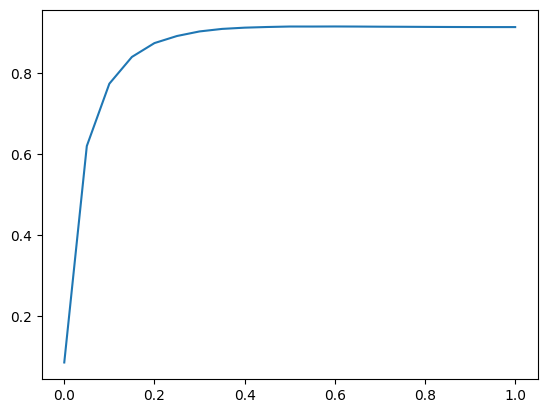

In [70]:
plt.plot(thresholds, scores)

In [71]:
from collections import Counter
Counter(y_pred >= 1.0)
1-y_val.mean()

0.9139917759814882

In [72]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [73]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

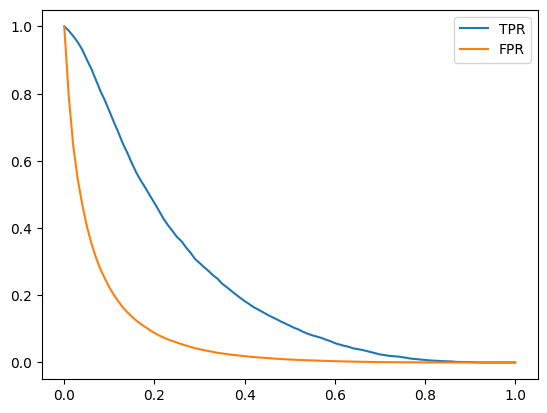

In [74]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### random model

In [76]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [77]:
((y_rand >= 0.5) == y_val).mean()


0.5018214793852311

In [78]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [79]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)


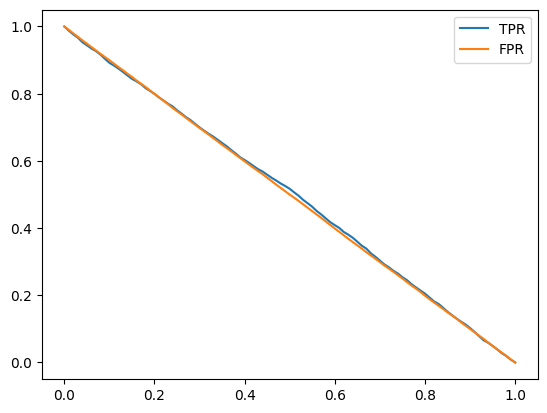

In [80]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### ideal model


In [81]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(58458, 5501)

In [82]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal


array([0, 0, 0, ..., 1, 1, 1])

In [83]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [86]:
1 - y_val.mean()


0.9139917759814882

In [87]:
accuracy_score(y_ideal, y_ideal_pred >= (1 - y_val.mean()))


1.0

In [88]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,5501,58458,0,0,1.000000,1.000000
10,0.1,5501,52062,0,6396,1.000000,0.890588
20,0.2,5501,45666,0,12792,1.000000,0.781176
30,0.3,5501,39270,0,19188,1.000000,0.671764
40,0.4,5501,32874,0,25584,1.000000,0.562352
50,0.5,5501,26478,0,31980,1.000000,0.452941
60,0.6,5501,20083,0,38375,1.000000,0.343546
70,0.7,5501,13687,0,44771,1.000000,0.234134
80,0.8,5501,7291,0,51167,1.000000,0.124722
90,0.9,5501,895,0,57563,1.000000,0.015310


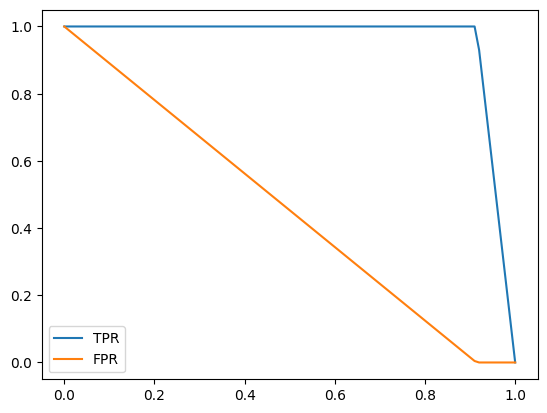

In [89]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

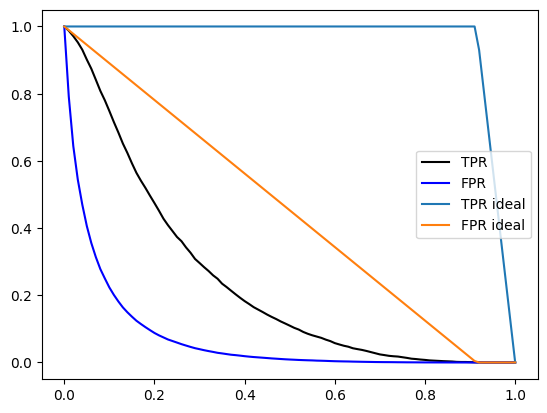

In [90]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

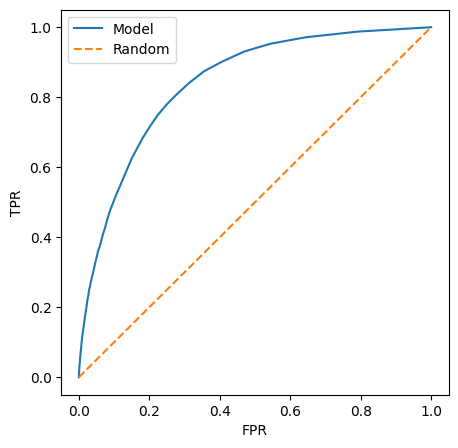

In [91]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [92]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)


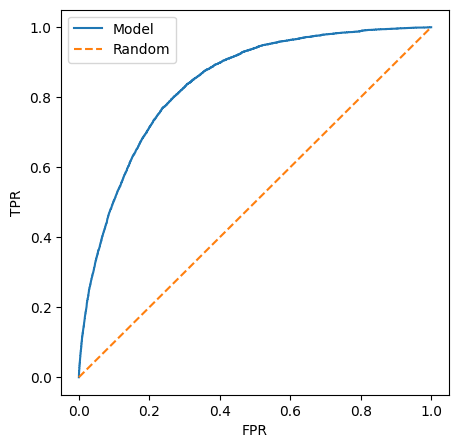

In [93]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

### ROC AUC

In [94]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

auc(fpr, tpr)


0.840513130743138

In [95]:
auc(df_scores.fpr, df_scores.tpr)


0.8397563239647228

In [96]:
auc(df_ideal.fpr, df_ideal.tpr)


0.999847153465589

In [98]:
import random
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.83923

In [99]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.8414

### Cross-Validation

In [100]:
def predict(df, dv, model):
    df = df.copy()
    scaler = StandardScaler()
    # df[numerical] = scaler.fit_transform(df[numerical].values)
    dicts = df[categorical + numeric_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [101]:
y_pred = predict(df_val, dv, model)


In [102]:
from tqdm.auto import tqdm


c:\Users\wufen\.virtualenvs\machineleaning_heartdisease-0J7kO8TS\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [110]:
def train(df_train, y_train, C=1.0):
    df_train = df_train.copy()
    scaler = StandardScaler()
    df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns].values)
    dicts = df_train[categorical + numeric_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [103]:
dv, model

(DictVectorizer(sparse=False), LogisticRegression())

In [105]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.heartdisease.values
        y_val = df_val.heartdisease.values

        # dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [00:12<01:14, 12.43s/it]

C=0.001 0.830 +- 0.003


 29%|██▊       | 2/7 [00:26<01:05, 13.17s/it]

C=0.01 0.830 +- 0.003


 43%|████▎     | 3/7 [00:40<00:54, 13.64s/it]

C=0.1 0.830 +- 0.003


 57%|█████▋    | 4/7 [00:56<00:43, 14.55s/it]

C=0.5 0.830 +- 0.003


 71%|███████▏  | 5/7 [01:15<00:32, 16.14s/it]

C=1 0.830 +- 0.003


 86%|████████▌ | 6/7 [01:26<00:14, 14.62s/it]

C=5 0.830 +- 0.003


100%|██████████| 7/7 [01:43<00:00, 14.81s/it]

C=10 0.830 +- 0.003


In [106]:
scores

[0.8314691193359637,
 0.8266002729876275,
 0.8341787184792664,
 0.8330289805073096,
 0.826686571434149]

In [107]:
n_splits = 5
C=1.0
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.heartdisease.values
    y_val = df_val.heartdisease.values

    # dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1.0 0.830 +- 0.003


In [108]:
df_test.columns

Index(['bmi', 'smoking', 'alcoholdrinking', 'stroke', 'physicalhealth',
       'mentalhealth', 'diffwalking', 'sex', 'agecategory', 'race', 'diabetic',
       'physicalactivity', 'genhealth', 'sleeptime', 'asthma', 'kidneydisease',
       'skincancer'],
      dtype='object')

In [111]:
dv, model = train(df_full_train, df_full_train.heartdisease.values, C=1.0)
y_pred = predict(df_test, dv, model)

# y_test = df_test.heartdisease.values
auc = roc_auc_score(y_test, y_pred)
auc

0.8429967263751217

In [112]:
import pickle

with open(f'model_C={C}.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)



In [113]:
input_file = 'model_C=1.0.bin'
with open(input_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)

In [114]:
model

LogisticRegression(max_iter=1000)

In [126]:
# df_test[1]# = df_test[categorical + numerical].to_dict(orient='records')
customer=dict(  df_test.iloc[0])
customer,
# X_test = dv.transform([customer])
# y_pred = model.predict_proba(X_test)[0, 1]
# y_pred
y_test[0]

0

In [116]:
X = dv.transform([customer])
y_pred = model.predict_proba(X)[0, 1]


In [117]:
print('input:', customer)
print('output:', y_pred)

input: {'bmi': -0.6340838353307308, 'smoking': 'no', 'alcoholdrinking': 'no', 'stroke': 'no', 'physicalhealth': -0.42371877592407525, 'mentalhealth': 1.397700211195245, 'diffwalking': 'no', 'sex': 'female', 'agecategory': '40-44', 'race': 'white', 'diabetic': 'no', 'physicalactivity': 'yes', 'genhealth': 'excellent', 'sleeptime': -0.06756029002535556, 'asthma': 'no', 'kidneydisease': 'no', 'skincancer': 'no'}
output: 0.005234701715567629


In [118]:
import requests


In [119]:
url = 'http://localhost:9696/predict'


###  in terminal 
run  "python predict.py"  # single worker ..time consuming  (not recommended)
run  "gunicorn --bind 0.0.0.0:9696 predict:app"  # multi worker in linux 
run  "waitress-serve --listen=*:9696 predict:app"  # multi worker in windows

In [128]:
# response = requests.post(url, json=customer)
# result = response.json()
# result['heartdisease']

In [130]:
j=0
for i in range(2000):
    customer = df_test.iloc[i].to_dict()
    response = requests.post(url, json=customer)
    result = response.json()
    if int(result['heartdisease']==True)==y_test[i]:
        j+=1

print(j)    
    


1822


In [131]:
print(1822/2000)  # precision    but in unbalance dataset .it's kind of meanless

0.911
